# Imports

Colab

In [1]:
import gc
import warnings


In [2]:
warnings.filterwarnings('ignore')

Preprocessing

In [17]:
! pip install contractions

     |████████████████████████████████| 284 kB 5.7 MB/s 
     |████████████████████████████████| 321 kB 50.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85449 sha256=e380a103795f892a153039130fb3fc5c15fcc71b80f67e6cee36e2dc74c510a9
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [18]:
import contractions

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

Embedding

In [6]:
import gensim
import gensim.downloader


Split dataset

In [7]:
from sklearn.model_selection import train_test_split

Machine learning models

In [ ]:
from sklearn.model_selection import train_test_split

# Models

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# Metrics

from sklearn.metrics import accuracy_score, f1_score

Neural networks


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

from tensorflow.keras.utils import plot_model, to_categorical

Others

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from wordcloud import WordCloud

import re
import string

# Reading dataset

**Dataset:** Toxic Tweets

**Source:** https://www.kaggle.com/ashwiniyer176/toxic-tweets-dataset

**About:** This dataset is a combination of various datasets which had high levels of class imbalance in them. No data was changed edited or emoved from any of the datasets to maintain the integrity of the data. Only a combination of various datasets in order to achieve balance. 

---

**Labels:**
```
# toxic=1; not-toxic=0
```



In [11]:
df = pd.read_csv('/content/drive/MyDrive/ML IA2/hate_speech.csv', usecols=['Toxicity', 'tweet'])

In [12]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [13]:
df.rename({ 'Toxicity': 'label' }, axis=1, inplace=True)

In [14]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


# Preprocessing

## Cleaning

In [15]:
def createTokens(tweet):
    tokens = []

    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))

    # Remove contractions
    tweet = contractions.fix(tweet)

    # Remove punctuations
    tweet = tweet.translate(translator)

    # Remove non-ascii characters
    tweet = tweet.encode('ASCII', 'ignore').decode()

    # Tokenize
    tweet = tokenize.word_tokenize(tweet)

    # Remove stopwords
    for word in tweet:
        if word not in set(stopwords.words('english')).difference({'no', 'not', 'nor'}):
            tokens.append(word)


    return tokens

In [19]:
tokens = df.tweet.apply(lambda r: createTokens(r))

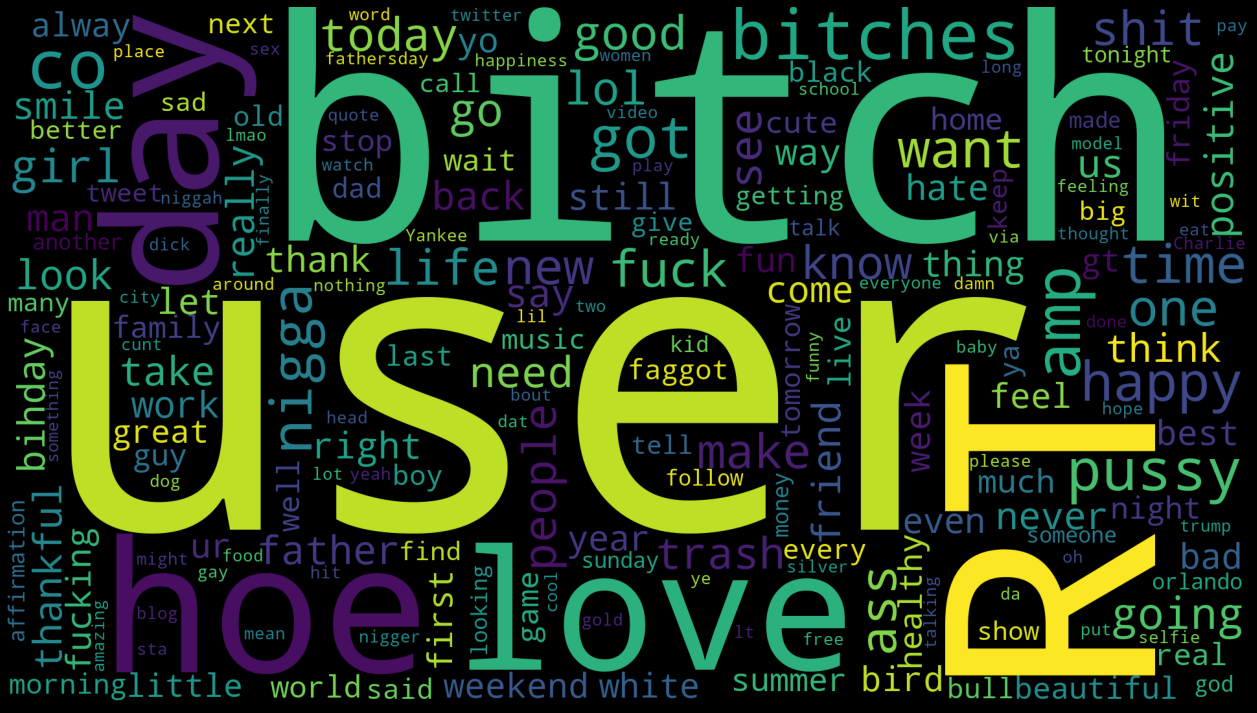

In [21]:
word_cloud = WordCloud(width=1920, height=1080, collocations=False)
word_cloud.generate(' '.join([word for row in tokens for word in row]))

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.axis("off")

plt.show()

## Embedding

In [ ]:
# word2vec-google-news-300

gensim.downloader.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [ ]:
word2vec = gensim.models.Word2Vec(size=300, min_count=1, workers=4)

In [ ]:
word2vec.build_vocab(tokens)

In [ ]:
word2vec.intersect_word2vec_format('/content/drive/MyDrive/ML IA2/word2vec-google-news-300.gz', binary=True, lockf=1.0)

## Vectorization

In [ ]:
def createVector(tokens):
    vectors = []
    vector = np.zeros((word2vec.vector_size,))

    for _ in tokens:
        for i in _:
            vector = vector + word2vec[i]
        vectors.append(vector)

    return np.asarray(vectors)

## Prepare Data

In [ ]:
labels = df['label']

In [ ]:
vectors = createVector(tokens)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectors, labels, random_state=1)

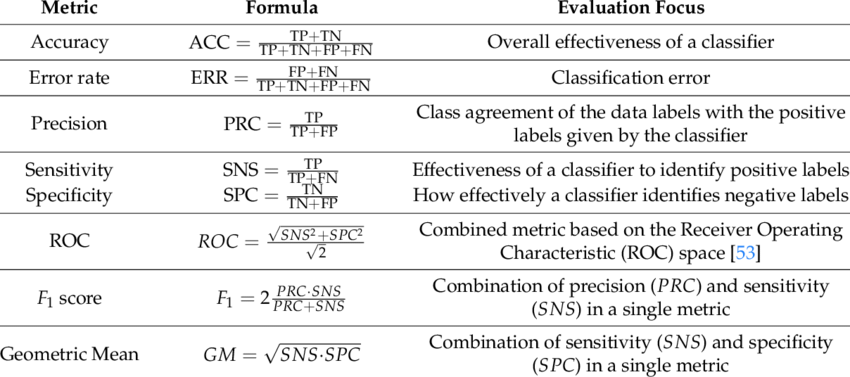

# Machine Learning

In [ ]:
modelSVC = SVC(C=100).fit(X_train, y_train)
y_pred = modelSVC.predict(X_test)
sum(y_pred == 1), len(y_test), f1_score(y_test, y_pred)

(8314, 14187, 0.9114536113629496)

In [ ]:
modelLR = LogisticRegression(C=100).fit(X_train, y_train)
y_pred = modelLR.predict(X_test)
sum(y_pred == 1), len(y_test), f1_score(y_test, y_pred)

(8310, 14187, 0.9110694637567258)

In [ ]:
modelRF = RandomForestClassifier(n_estimators=20).fit(X_train, y_train)
y_pred = modelRF.predict(X_test)
sum(y_pred == 1), len(y_test), f1_score(y_test, y_pred)

(8214, 14187, 0.912617816965643)

# Neural Networks

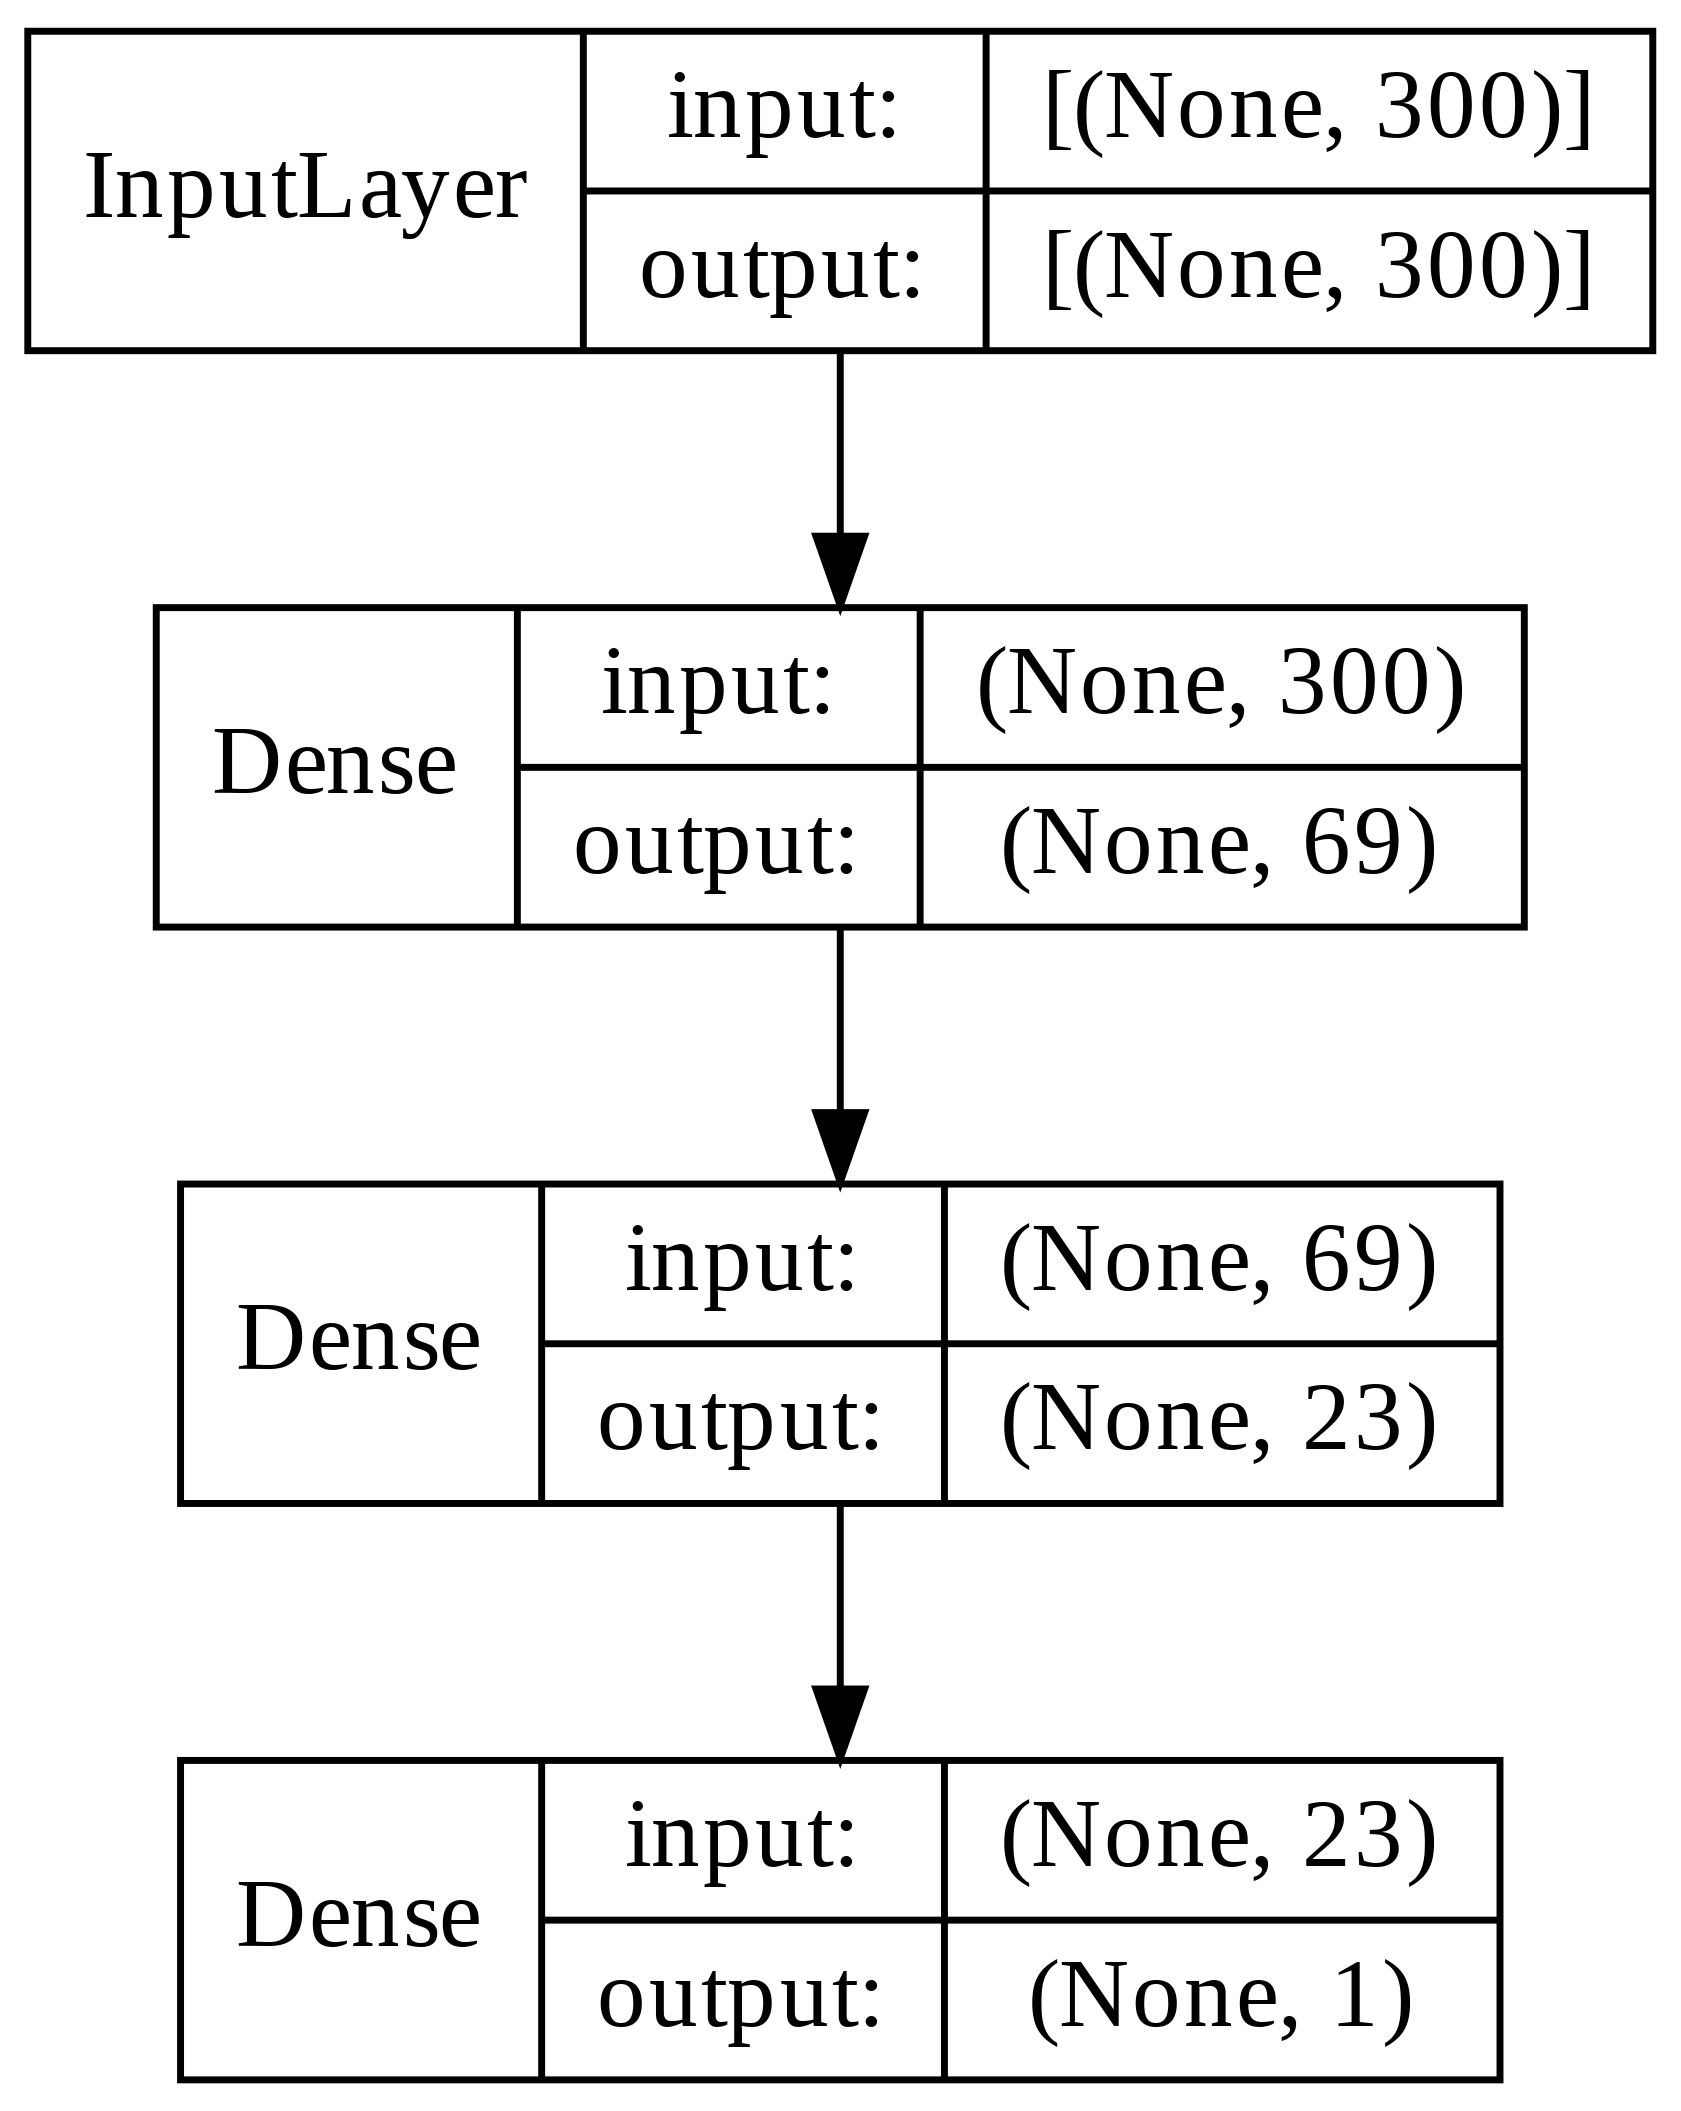

In [ ]:
model = Sequential([
                    layers.Dense(69, input_dim=300, activation='relu'),
                    # layers.Dropout(.2),
                    # layers.Dense(40, activation='elu'),
                    # layers.Dense(30, activation='relu'),
                    layers.Dense(23, activation='relu'),
                    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model, show_shapes=True, show_layer_names=False, dpi=500)

In [ ]:
history = model.fit(X_train, y_train, epochs=4)

Epoch 1/4
1330/1330 [==============================] - 2s 1ms/step - loss: 218.0337 - accuracy: 0.7574
Epoch 2/4
1330/1330 [==============================] - 2s 1ms/step - loss: 34.6822 - accuracy: 0.7867
Epoch 3/4
1330/1330 [==============================] - 2s 1ms/step - loss: 11.9579 - accuracy: 0.7974
Epoch 4/4
1330/1330 [==============================] - 2s 1ms/step - loss: 1.6989 - accuracy: 0.8374


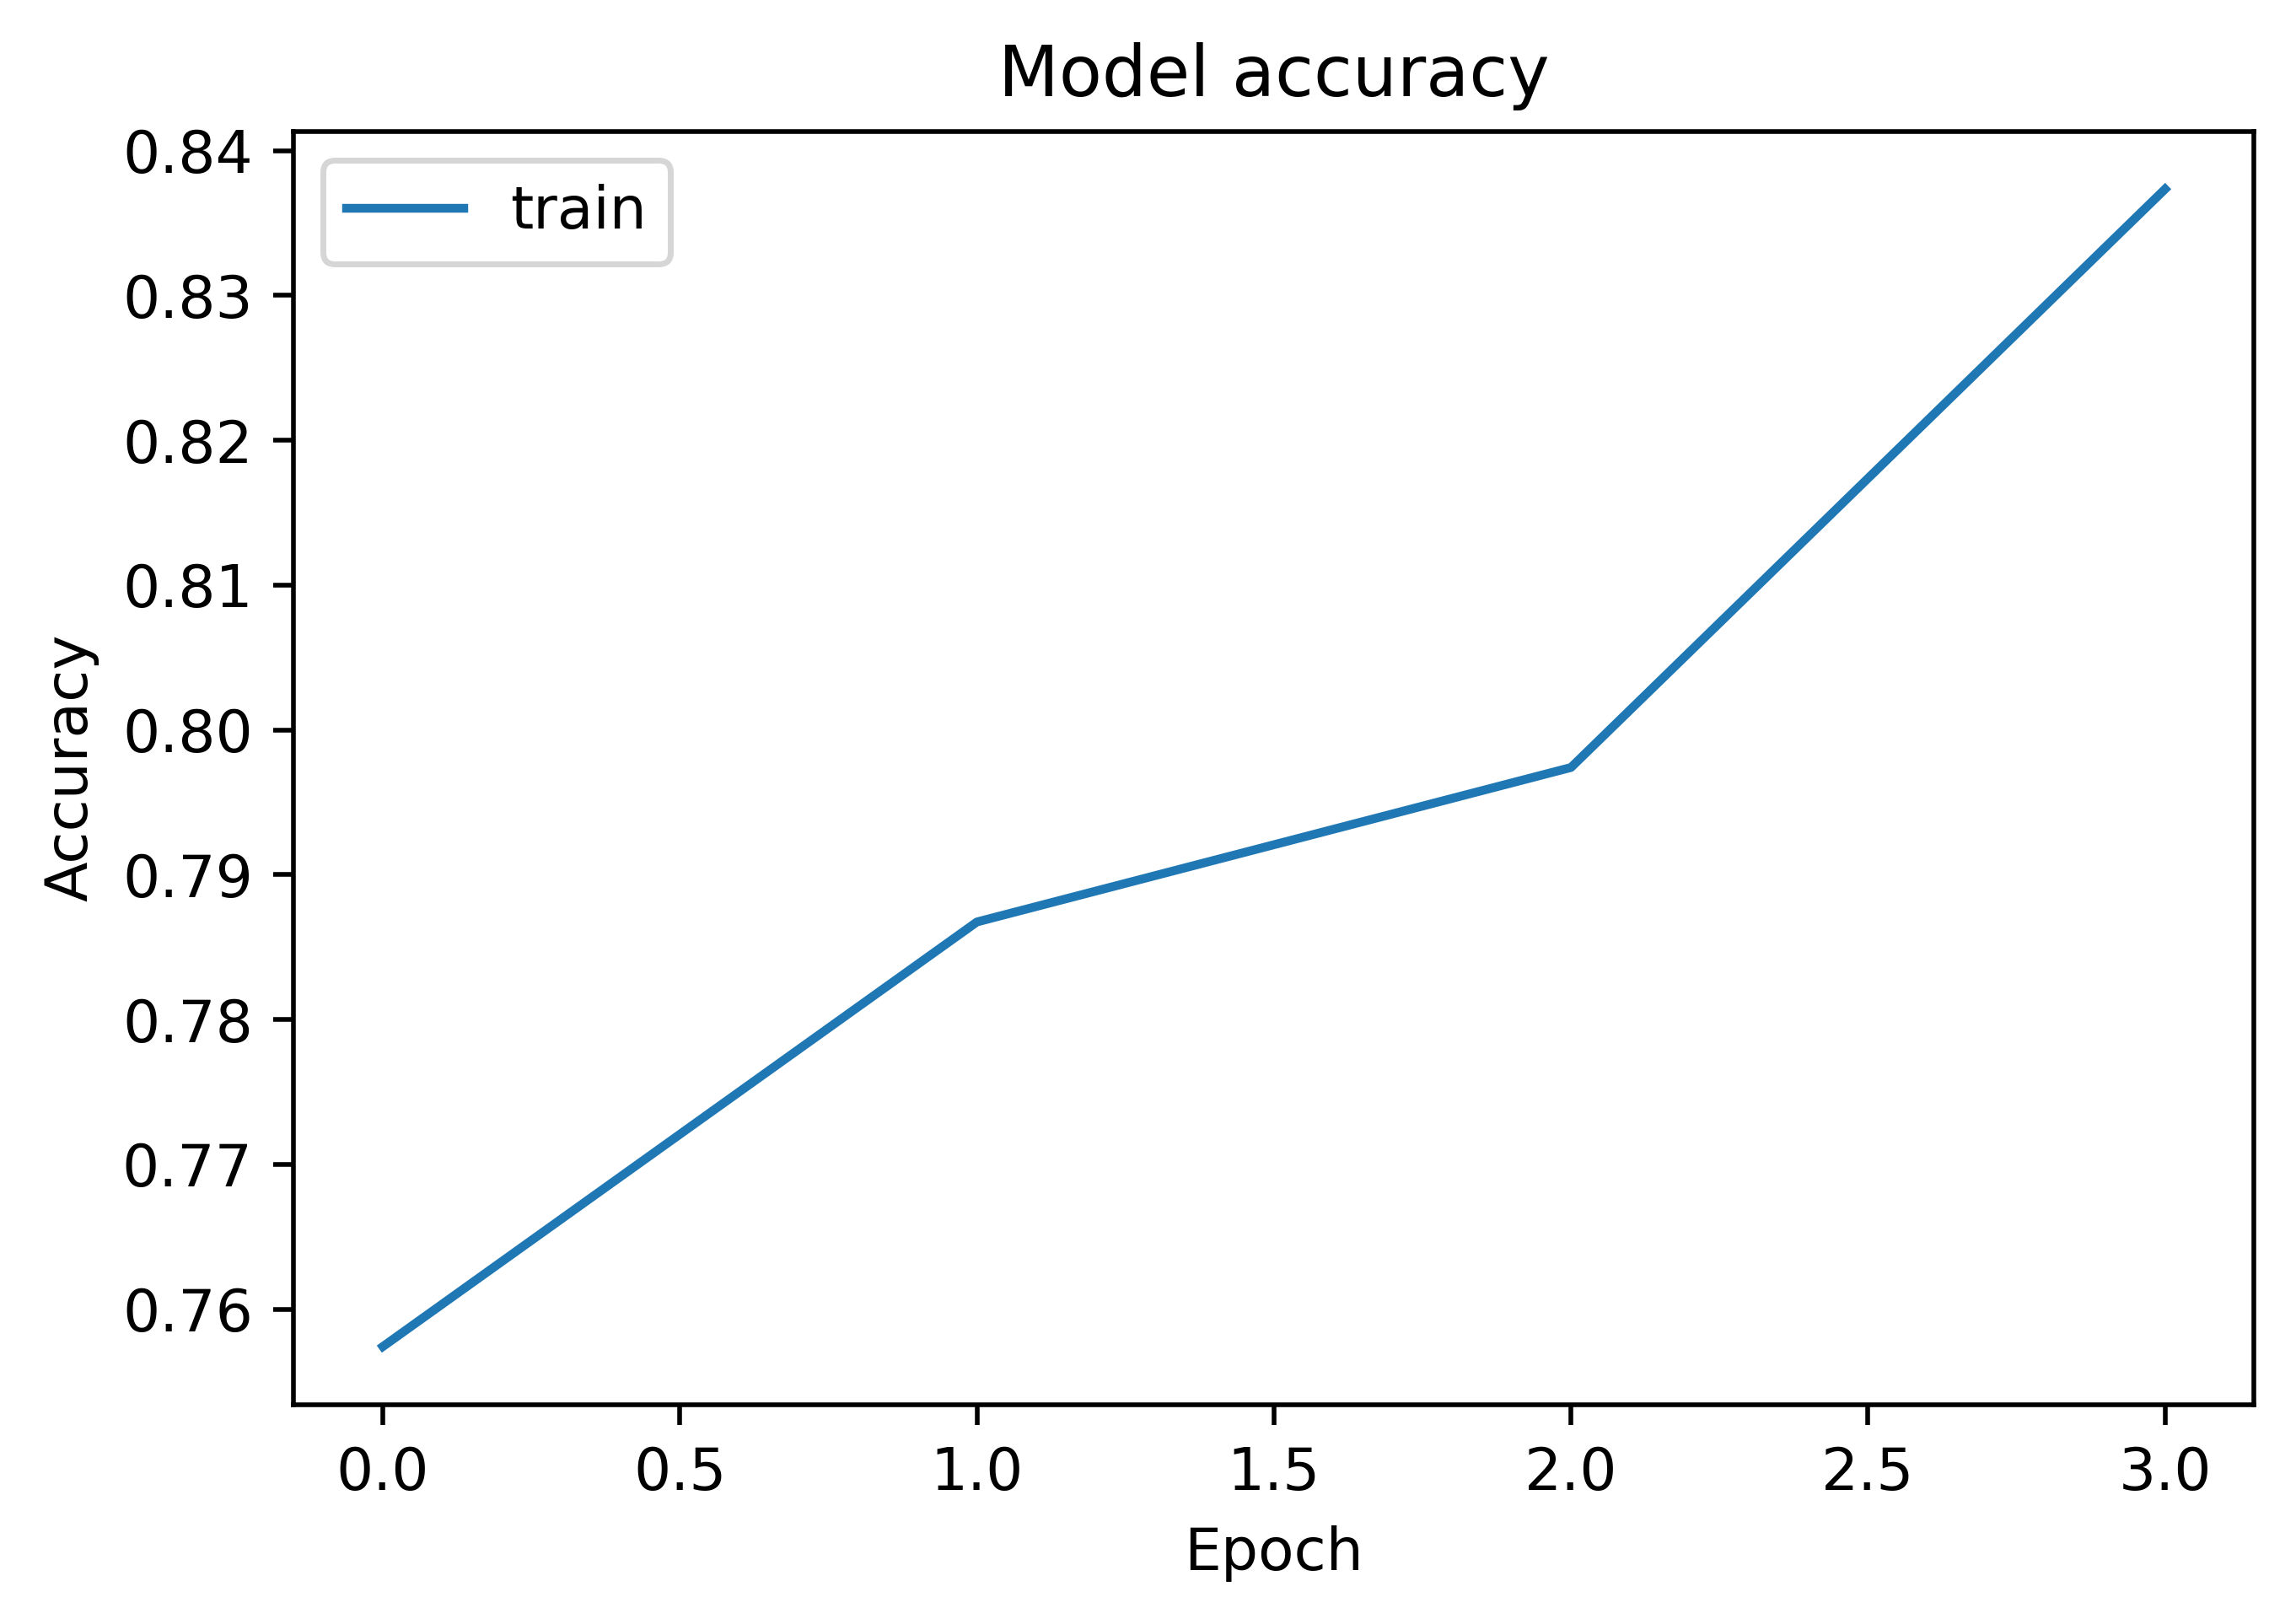

In [ ]:
plt.figure(dpi=500)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = [int(i > .5) for i in y_pred]

In [ ]:
accuracy_score(y_true, y_pred)

0.8823570874744484

In [ ]:
f1_score(y_test, y_pred)

0.9005541321575403